In [2]:
from PIL import Image
import matplotlib
matplotlib.use('Agg')
import numpy as np
import math
import operator
from functools import reduce
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.cluster import KMeans
import os
import shutil
# % matplotlib inline

# 构造路径图片

In [2]:
# 导入嘉定到四平的原始数据
df = pd.read_csv('C:\\Users\\D\\Desktop\\banche\\lujing\\result\\2-3.csv', encoding='gbk')
# df = pd.read_csv('C:\\Users\\D\\Desktop\\banche\\lujing\\result\\3-2.csv', encoding='gbk')

In [3]:
# 确定画图的经纬度范围
x_max = df.longitude.max()
x_min = df.longitude.min()
y_max = df.latitude.max()
y_min = df.latitude.min()

In [5]:
# 画图并保存到文件夹
for num in df.num.unique():
    m = df[df.num==num]
    plt.figure(figsize=(8,5))
    plt.xlim(x_min * 0.9995, x_max * 1.0001)
    plt.ylim(y_min * 0.9995, y_max * 1.0001)
    plt.axis('off')
    plt.plot(m.longitude,m.latitude,linewidth=20)
    plt.savefig('C:\\Users\\D\\Desktop\\line32\\{}.png'.format(num))

C:\Users\D\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


# 提取图像特征

In [4]:
# s = []
# for i in range(0,949):
#     image1 = Image.open('C:\\Users\\D\\Desktop\\line23\\{}.png'.format(i))
#     image3 = Image.open('C:\\Users\\D\\Desktop\\line23\\{}.png'.format(i+1))
#     #把图像对象转换为直方图数据，存在list h1、h2 中
#     h1=image1.histogram()
#     h2=image3.histogram()

#     result = math.sqrt(reduce(operator.add,  list(map(lambda a,b: (a-b)**2, h1, h2)))/len(h1) )
#     '''
#     sqrt:计算平方根，reduce函数：前一次调用的结果和sequence的下一个元素传递给operator.add
#     operator.add(x,y)对应表达式：x+y
#     这个函数是方差的数学公式：S^2= ∑(X-Y) ^2 / (n-1)
#     '''
#     s.append(result)

In [20]:
# 方差特征
def getss(list):
    avg=sum(list)/len(list)
    ss=0
    for l in list:
        ss+=(l-avg)*(l-avg)/len(list)   
    return ss

# 最值特征
def get_minindex(list):
    return list.index(min(list))

# 像素值横向特征
def getdiff(img):
    Sidelength=300
    img=cv2.resize(img,(Sidelength,Sidelength),interpolation=cv2.INTER_CUBIC)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    avglist=[]
    for i in range(Sidelength):
        avg=sum(gray[i])/len(gray[i])
        avglist.append(avg)
    return avglist

# 像素值纵向特征
def getdiff1(img):
    Sidelength=300
    img=cv2.resize(img,(Sidelength,Sidelength),interpolation=cv2.INTER_CUBIC)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray = gray.T
    avglist=[]
    for i in range(Sidelength):
        avg=sum(gray[i])/len(gray[i])
        avglist.append(avg)
    return avglist

# 局部特征
def get_part_diff(image):
    Sidelength=300
    img = image[:,280:-150,:]
    img=cv2.resize(img,(Sidelength,Sidelength),interpolation=cv2.INTER_CUBIC)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray = gray.T
    avglist=[]
    for i in range(Sidelength):
        avg=sum(gray[i])/len(gray[i])
        avglist.append(avg)
    return avglist

n = len(os.listdir('C:\\Users\\D\\Desktop\\line23'))
for i in range(0,n):
    img=cv2.imread('C:\\Users\\D\\Desktop\\line23\\{}.png'.format(i))
    diff=getdiff(img)
    diff1=get_part_diff(img)
    if i == 0:
        x = np.array([getss(diff),get_minindex(diff1)])
    else:
        x = np.row_stack((x,[getss(diff),get_minindex(diff1)]))

In [33]:
# 提取局部特征
# img1=cv2.imread('C:\\Users\\D\\Desktop\\line32\\{}.png'.format(2))
# a = img1[:,280:-150,:]
# cv2.imshow('a',a)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# 原理解释

In [23]:
img=cv2.imread('C:\\Users\\D\\Desktop\\line32\\{}.png'.format(0))
img=cv2.resize(img,(30,30),interpolation=cv2.INTER_CUBIC)
img1=cv2.imread('C:\\Users\\D\\Desktop\\line32\\{}.png'.format(1))
img1=cv2.resize(img1,(30,30),interpolation=cv2.INTER_CUBIC)

In [26]:
a = getdiff(img)
b = getdiff(img1)

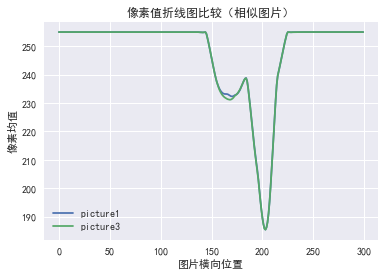

In [28]:
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False 
plt.xlabel(u'图片横向位置')
plt.ylabel(u'像素均值')
plt.title(u'像素值折线图比较（相似图片）')
plt.plot(a,label = 'picture1')
plt.plot(b,label = 'picture3')
plt.legend()

# 聚类算法

In [4]:
n_sample = n
n_clusters = 8
print(n_sample)

1098


In [21]:
y_pred = KMeans(n_clusters=n_clusters).fit_predict(x)

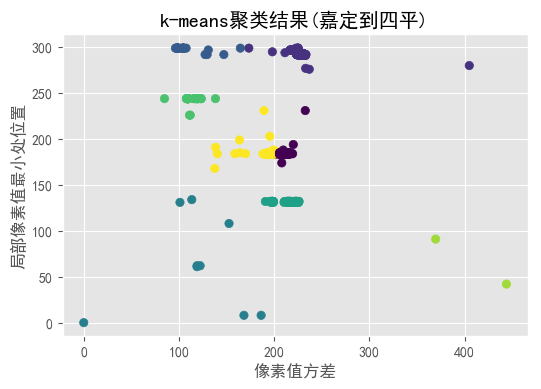

In [22]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False 
plt.figure(figsize=(6,4), dpi=100)
plt.xlabel(u'像素值方差')
plt.ylabel(u'局部像素值最小处位置')
plt.title(u'k-means聚类结果(嘉定到四平)')
plt.scatter(x[:,0],x[:,1],c =y_pred)

# 图片分类并为每一次行程标号

In [7]:
# 构造分类文件夹
for i in range(0,10):
#     shutil.rmtree('C:\\Users\\D\\Desktop\\{}\\'.format(i))
    os.mkdir('C:\\Users\\D\\Desktop\\{}\\'.format(i))

In [10]:
# 图片归类到文件夹
for i in range(0,1098):
    label = y_pred[i]
    shutil.copy('C:\\Users\\D\\Desktop\\line32\\{}.png'.format(i),'C:\\Users\\D\\Desktop\\{}\\'.format(label))

In [88]:
# 为每一次行程标号
labels = os.listdir('C:\\Users\\D\\Desktop\\23\\')

dic={}
for label in labels:
    path = 'C:\\Users\\D\\Desktop\\23\\' + label
    nos = list(map(lambda x:x.replace('.png','') ,os.listdir(path)))
    nos = list(map(int, nos))
    dic[label] = nos